Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск: 
Стат значимо ли отличается ARPPU в двух группах ? 
Какие рекомендации дадите менеджеру?

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import defaultdict

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
final = pd.read_csv('ab_stats.csv')

In [4]:
final.head()


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [8]:
final.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [10]:
final[(final['revenue'].isnull() == True) & (final['av_site visit'].isnull() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        0 non-null      float64
 1   num_purchases  0 non-null      int64  
 2   purchase       0 non-null      int64  
 3   ab_group       0 non-null      object 
 4   av_site visit  0 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 0.0+ bytes


In [5]:
new_final = final[final['revenue'] > 0]
new_final

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759
...,...,...,...,...,...
23426,2.489611,1,1,B,9.015714
23493,74.950000,5,1,B,5.881950
23495,3.667866,1,1,B,7.450014
23584,19.990000,1,1,B,9.813696


In [6]:
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [8]:
new_final[final['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,256.000000,256.000000,256.0,256.000000
mean,18.698469,2.343750,1.0,6.753074
std,87.527589,9.723582,0.0,2.043753
min,0.259689,1.000000,1.0,0.996753
25%,2.318301,1.000000,1.0,5.281247
50%,4.283160,1.000000,1.0,6.871241
75%,11.923141,2.000000,1.0,8.257506
max,1303.609284,152.000000,1.0,12.504262


In [9]:
new_final[final['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,234.000000,234.000000,234.0,234.000000
mean,12.362119,1.841880,1.0,6.844776
std,19.007065,2.354021,0.0,3.970112
min,0.259373,1.000000,1.0,-5.646523
25%,2.319883,1.000000,1.0,4.009016
50%,3.980000,1.000000,1.0,7.143956
75%,12.274829,2.000000,1.0,9.776519
max,113.830000,25.000000,1.0,16.955948


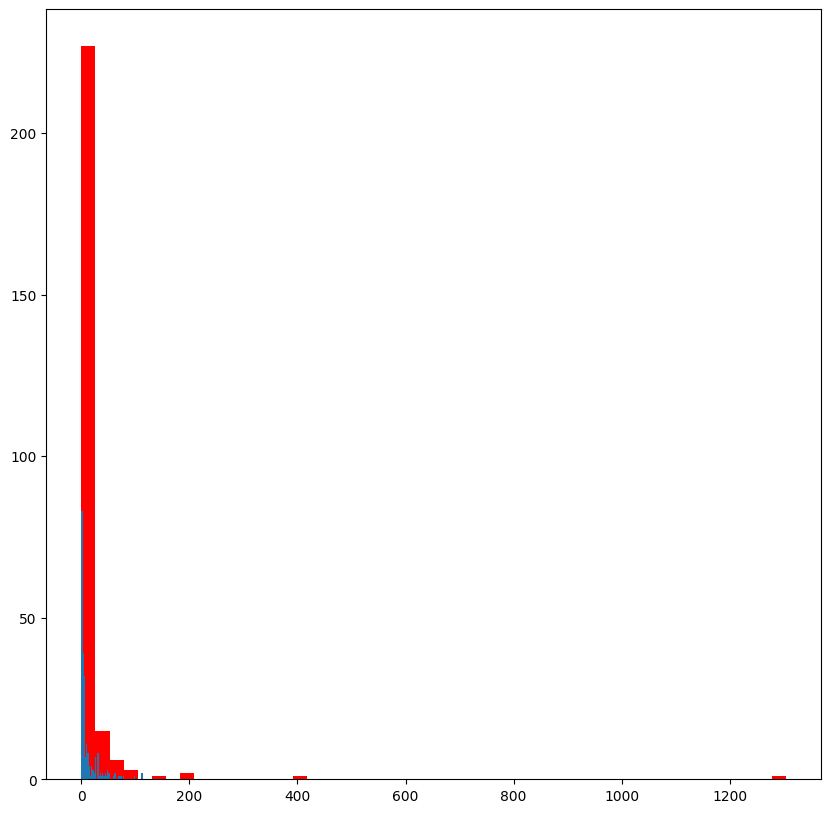

In [10]:
plt.figure(figsize=(10, 10))
control_group_A = new_final['revenue'][final['ab_group']=='A']
control_group_B = new_final['revenue'][final['ab_group']=='B']

plt.hist(control_group_A, color='r', bins=50)
plt.hist(control_group_B, bins=50)

plt.show()

In [11]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy.stats import norm

In [12]:
ttest_ind(control_group_A, control_group_B, equal_var = False)

TtestResult(statistic=1.1295123189663723, pvalue=0.2596444677902523, df=281.17051291452685)

Так как pvalue больше 0.05, то  значимых изменений не наблюдается.

In [13]:
print(kstest(control_group_A, 'norm'))
print(kstest(control_group_B, 'norm'))

KstestResult(statistic=0.8312038740127529, pvalue=5.535202851866459e-197, statistic_location=1.9727, statistic_sign=-1)
KstestResult(statistic=0.8635160979681316, pvalue=1.877582850318663e-202, statistic_location=1.953625, statistic_sign=-1)


In [14]:
mannwhitneyu(control_group_A, control_group_B)

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

pvalue > 0.05, значимых изменений нет.

Статистической значимости нет.